In [67]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
df_control = pd.read_csv('control_group.csv')
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_treatment = pd.read_csv('test_group.csv')
df_treatment.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


# Data Exploration

In [33]:
df_control.shape

(30, 10)

In [34]:
df_treatment.shape

(30, 10)

In [35]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [36]:
df_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [37]:
df_control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [38]:
df_treatment.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [39]:
df_control.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [40]:
df_treatment.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

# Data Cleansing

In [41]:
df_control.columns = df_control.columns.str.replace('#','Number')
df_control.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', 'Number of Impressions',
       'Reach', 'Number of Website Clicks', 'Number of Searches',
       'Number of View Content', 'Number of Add to Cart',
       'Number of Purchase'],
      dtype='object')

In [42]:
df_treatment.columns = df_treatment.columns.str.replace('#','Number')
df_treatment.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', 'Number of Impressions',
       'Reach', 'Number of Website Clicks', 'Number of Searches',
       'Number of View Content', 'Number of Add to Cart',
       'Number of Purchase'],
      dtype='object')

In [45]:
df_control.rename(columns= lambda x: x.strip().replace(' ','_'),inplace=True)
df_control.columns

Index(['Campaign_Name', 'Date', 'Spend_[USD]', 'Number_of_Impressions',
       'Reach', 'Number_of_Website_Clicks', 'Number_of_Searches',
       'Number_of_View_Content', 'Number_of_Add_to_Cart',
       'Number_of_Purchase'],
      dtype='object')

In [47]:
df_treatment.rename(columns= lambda x: x.strip().replace(' ','_'),inplace=True)
df_treatment.columns

Index(['Campaign_Name', 'Date', 'Spend_[USD]', 'Number_of_Impressions',
       'Reach', 'Number_of_Website_Clicks', 'Number_of_Searches',
       'Number_of_View_Content', 'Number_of_Add_to_Cart',
       'Number_of_Purchase'],
      dtype='object')

In [54]:
df_control.describe()

,Spend_[USD],Number_of_Impressions,Reach,Number_of_Website_Clicks,Number_of_Searches,Number_of_View_Content,Number_of_Add_to_Cart,Number_of_Purchase
count,30.000000,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21311.695472,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,95191.250000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,112368.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121259.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [55]:
# Mengatasi Missing Value
df_control['Number_of_Impressions'].fillna(value=df_control['Number_of_Impressions'].mean(),inplace=True)
df_control['Reach'].fillna(value=df_control['Reach'].mean(),inplace=True)
df_control['Number_of_Website_Clicks'].fillna(value=df_control['Number_of_Website_Clicks'].mean(),inplace=True)
df_control['Number_of_Searches'].fillna(value=df_control['Number_of_Searches'].mean(),inplace=True)
df_control['Number_of_View_Content'].fillna(value=df_control['Number_of_View_Content'].mean(),inplace=True)
df_control['Number_of_Add_to_Cart'].fillna(value=df_control['Number_of_Add_to_Cart'].mean(),inplace=True)
df_control['Number_of_Purchase'].fillna(value=df_control['Number_of_Purchase'].mean(),inplace=True)

In [63]:
# Mengganti type data float ke int 
df_control['Number_of_Impressions'] = df_control['Number_of_Impressions'].astype('int64')
df_control['Reach'] = df_control['Reach'].astype('int64')
df_control['Number_of_Website_Clicks'] = df_control['Number_of_Website_Clicks'].astype('int64')
df_control['Number_of_Searches'] = df_control['Number_of_Searches'].astype('int64')
df_control['Number_of_View_Content'] = df_control['Number_of_View_Content'].astype('int64')
df_control['Number_of_Add_to_Cart'] = df_control['Number_of_Add_to_Cart'].astype('int64')
df_control['Number_of_Purchase'] = df_control['Number_of_Purchase'].astype('int64')

In [64]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Campaign_Name             30 non-null     object
 1   Date                      30 non-null     object
 2   Spend_[USD]               30 non-null     int64 
 3   Number_of_Impressions     30 non-null     int64 
 4   Reach                     30 non-null     int64 
 5   Number_of_Website_Clicks  30 non-null     int64 
 6   Number_of_Searches        30 non-null     int64 
 7   Number_of_View_Content    30 non-null     int64 
 8   Number_of_Add_to_Cart     30 non-null     int64 
 9   Number_of_Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


# Merging Dataset

In [65]:
campaign_data = df_control.merge(df_treatment, how='outer').sort_values(by='Date')
campaign_data = campaign_data.reset_index(drop=True)
campaign_data.head()

,Campaign_Name,Date,Spend_[USD],Number_of_Impressions,Reach,Number_of_Website_Clicks,Number_of_Searches,Number_of_View_Content,Number_of_Add_to_Cart,Number_of_Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
2,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275
3,Control Campaign,10.08.2019,2149,117624,91257,2277,2475,1984,1629,734
4,Test Campaign,11.08.2019,2420,83633,71286,3750,2893,2617,1075,668


In [66]:
campaign_data.shape

(60, 10)

# Exploration Data Analysis

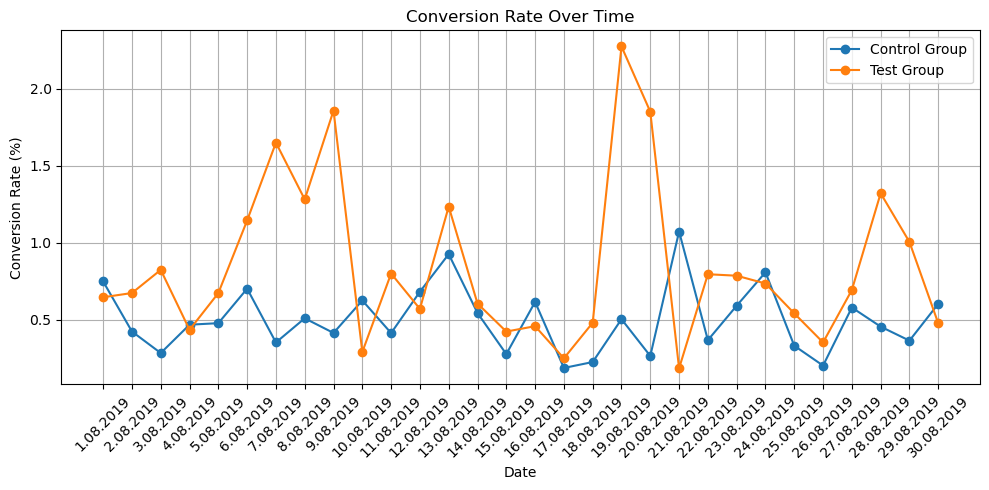

In [70]:
# membuat time series untuk conversion rate
plt.figure(figsize=(10, 5))

plt.plot(df_control['Date'], 
         df_control['Number_of_Purchase'] / df_control['Number_of_Impressions'] * 100, 
         label='Control Group', 
         marker='o', 
         linestyle='-')

plt.plot(df_treatment['Date'], 
         df_treatment['Number_of_Purchase'] / df_treatment['Number_of_Impressions'] * 100, 
         label='Test Group', 
         marker='o', 
         linestyle='-')

plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

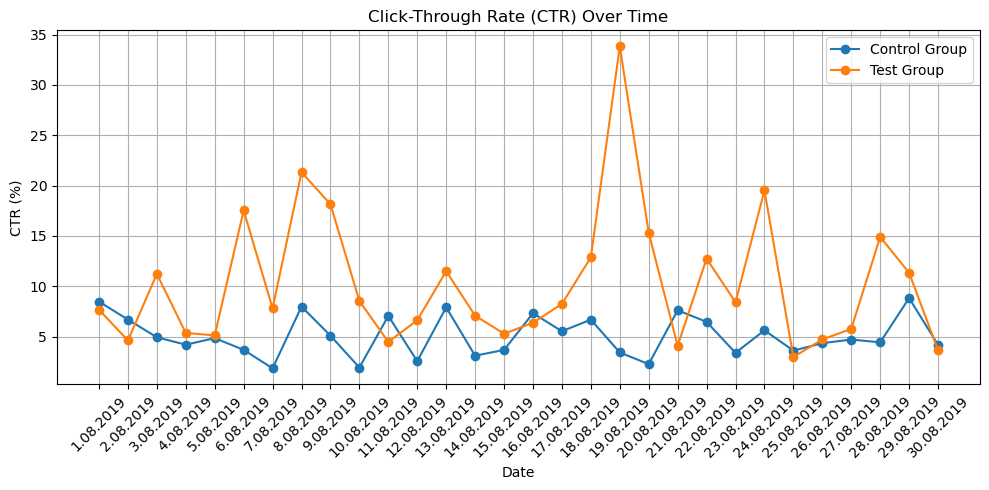

In [71]:
# membuat time-series untuk Click-Through Rate (CTR)
plt.figure(figsize=(10, 5))

plt.plot(df_control['Date'], 
         df_control['Number_of_Website_Clicks'] / df_control['Number_of_Impressions'] * 100, 
         label='Control Group', 
         marker='o', 
         linestyle='-')

plt.plot(df_treatment['Date'], 
         df_treatment['Number_of_Website_Clicks'] / df_treatment['Number_of_Impressions'] * 100, 
         label='Test Group', 
         marker='o', 
         linestyle='-')

plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.title('Click-Through Rate (CTR) Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

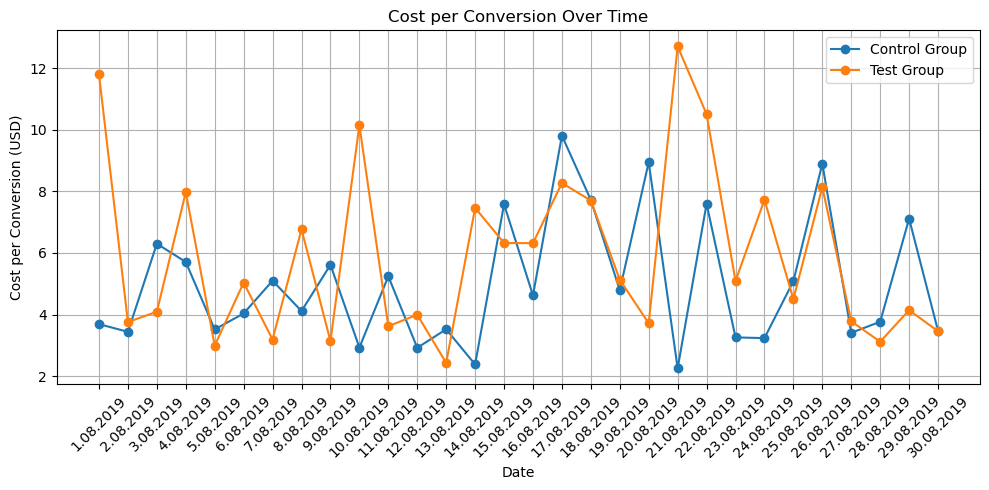

In [72]:
# membuat time-series untuk Cost per Conversion
plt.figure(figsize=(10, 5))

plt.plot(df_control['Date'], 
         df_control['Spend_[USD]'] / df_control['Number_of_Purchase'], 
         label='Control Group', 
         marker='o', 
         linestyle='-')

plt.plot(df_treatment['Date'], 
         df_treatment['Spend_[USD]'] / df_treatment['Number_of_Purchase'], 
         label='Test Group', 
         marker='o', 
         linestyle='-')

plt.xlabel('Date')
plt.ylabel('Cost per Conversion (USD)')
plt.title('Cost per Conversion Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()